In [2]:
import pandas as pd

corn_yield_data_path = r"C:\Users\HP\Desktop\Modeling Project\corn_yield_data.csv"
corn_yield_data = pd.read_csv(corn_yield_data_path)


temperature_data_path = r"C:\Users\HP\Desktop\Modeling Project\average_monthly_temperature_by_state.csv"
temperature_data = pd.read_csv(temperature_data_path)


In [4]:
print(corn_yield_data.head())
print(temperature_data.head())

  Program    Year Period  Week Ending Geo Level       State  State ANSI  \
0  SURVEY  2023.0   YEAR          NaN     STATE     ALABAMA         1.0   
1  SURVEY  2023.0   YEAR          NaN     STATE     ARIZONA         4.0   
2  SURVEY  2023.0   YEAR          NaN     STATE    ARKANSAS         5.0   
3  SURVEY  2023.0   YEAR          NaN     STATE  CALIFORNIA         6.0   
4  SURVEY  2023.0   YEAR          NaN     STATE    COLORADO         8.0   

   Ag District       state  County  ...  Zip Code  Region  watershed_code  \
0          NaN     Alabama     NaN  ...       NaN     NaN               0   
1          NaN     Arizona     NaN  ...       NaN     NaN               0   
2          NaN    Arkansas     NaN  ...       NaN     NaN               0   
3          NaN  California     NaN  ...       NaN     NaN               0   
4          NaN    Colorado     NaN  ...       NaN     NaN               0   

  Watershed  Commodity                                   Data Item Domain  \
0       N

In [64]:
corn_yield_data = corn_yield_data[['Year', 'state', 'State ANSI', 'Value']]
corn_yield_data.drop_duplicates(subset=['Year', 'state', 'State ANSI', 'Value'], inplace=True)

In [65]:
print(corn_yield_data.head())

     Year        state  State ANSI  Value
0  1866.0      Alabama         1.0    9.0
1  1866.0     Arkansas         5.0   18.0
2  1866.0   California         6.0   28.0
3  1866.0  Connecticut         9.0   34.0
4  1866.0     Delaware        10.0   23.0


In [22]:
temperature_data_path = r"C:\Users\HP\Desktop\Modeling Project\average_monthly_temperature_by_state.csv"
temperature_data = pd.read_csv(temperature_data_path)

In [66]:
temperature_data = temperature_data[['Year', 'state', 'average_temp']]
temperature_data.drop_duplicates(subset=['Year', 'state', 'average_temp'], inplace=True)

In [67]:
print(temperature_data.head())

   Year       state  average_temp
0  1950     Alabama     63.425000
1  1950     Arizona     60.166667
2  1950    Arkansas     60.050000
3  1950  California     57.841667
4  1950    Colorado     45.041667


In [68]:
print(corn_yield_data.head())

print(temperature_data.head())

     Year        state  State ANSI  Value
0  1866.0      Alabama         1.0    9.0
1  1866.0     Arkansas         5.0   18.0
2  1866.0   California         6.0   28.0
3  1866.0  Connecticut         9.0   34.0
4  1866.0     Delaware        10.0   23.0
   Year       state  average_temp
0  1950     Alabama     63.425000
1  1950     Arizona     60.166667
2  1950    Arkansas     60.050000
3  1950  California     57.841667
4  1950    Colorado     45.041667


In [69]:
merged_data = pd.merge(corn_yield_data, temperature_data, on=['Year', 'state'], how='inner')

In [70]:
print(merged_data.head())

     Year       state  State ANSI  Value  average_temp
0  1950.0     Alabama         1.0   21.5     63.425000
1  1950.0     Arizona         4.0   15.0     60.166667
2  1950.0    Arkansas         5.0   23.5     60.050000
3  1950.0  California         6.0   43.0     57.841667
4  1950.0    Colorado         8.0   24.5     45.041667


In [71]:
merged_data.to_csv('C:/Users/HP/Desktop/Modeling Project/merged_data.csv', index=False)

In [72]:
import pandas as pd

In [74]:
print("Basic Data Infromation:")
print(merged_data.info())

Basic Data Infromation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          3065 non-null   float64
 1   state         3065 non-null   object 
 2   State ANSI    3065 non-null   float64
 3   Value         3065 non-null   float64
 4   average_temp  3065 non-null   float64
dtypes: float64(4), object(1)
memory usage: 119.9+ KB
None


In [75]:
print("\nSummary Statistics:")
print(merged_data.describe())


Summary Statistics:
              Year   State ANSI        Value  average_temp
count  3065.000000  3065.000000  3065.000000   3065.000000
mean   1985.308972    30.059706    99.521044     52.783911
std      21.310020    15.678540    47.753033      7.948369
min    1950.000000     1.000000    10.500000     34.841667
25%    1966.000000    18.000000    61.000000     46.358333
50%    1985.000000    30.000000    96.000000     52.600000
75%    2004.000000    42.000000   134.600000     58.866667
max    2022.000000    56.000000   241.000000     73.475000


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


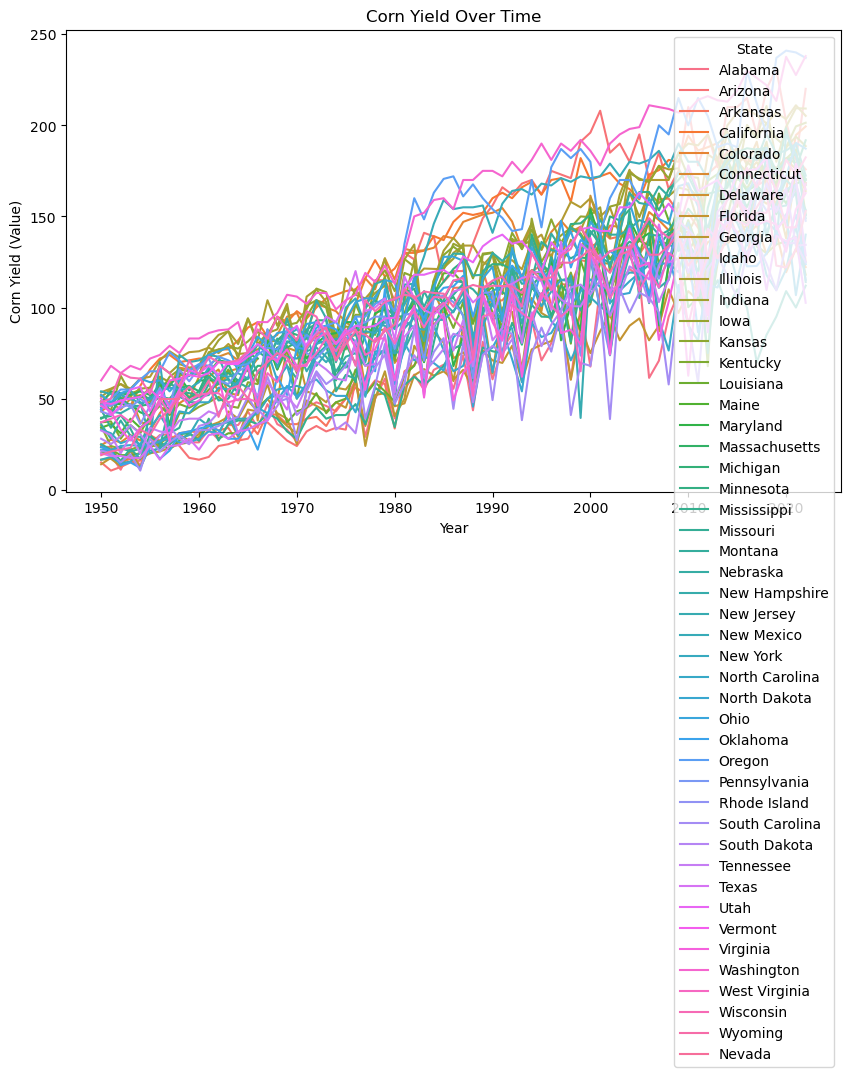

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='Value', hue='state')
plt.title('Corn Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Corn Yield (Value)')
plt.legend(title='State')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


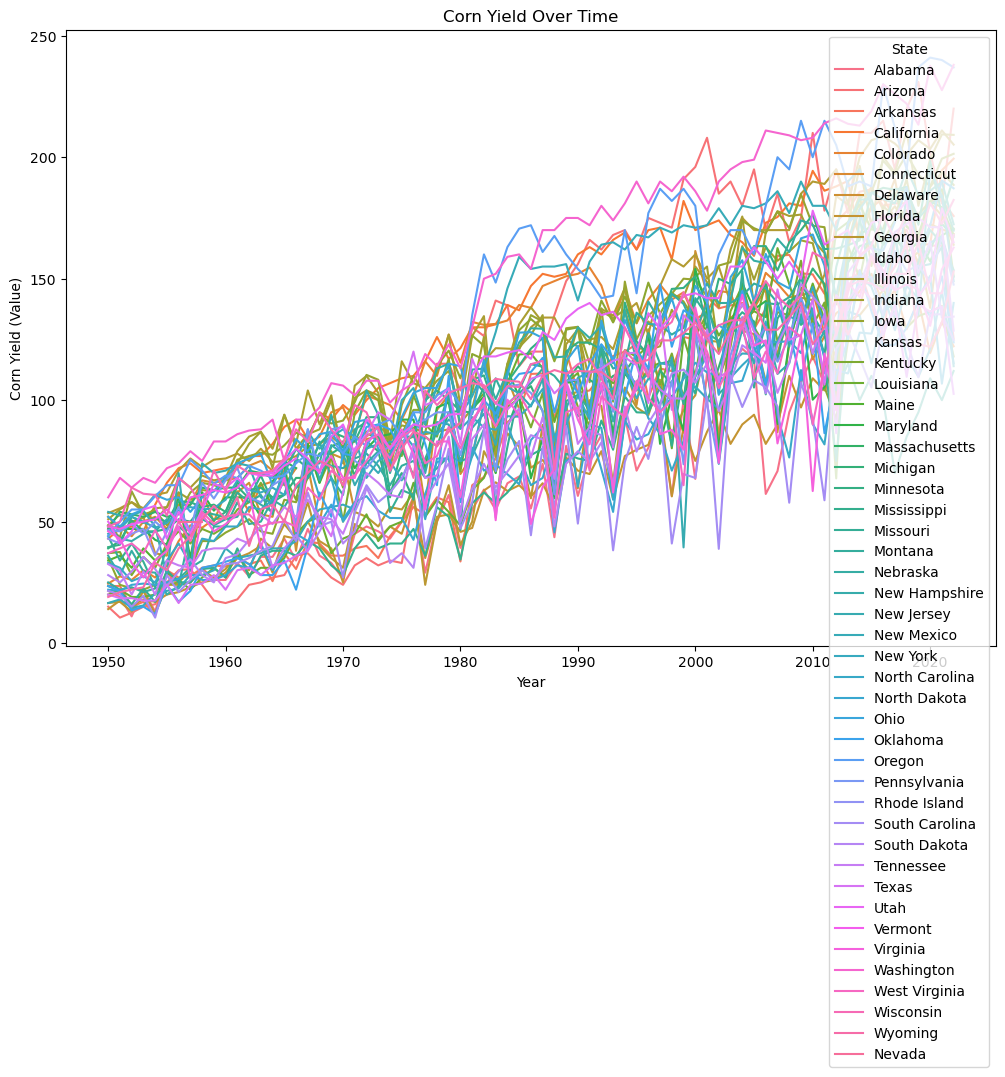

In [94]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_data, x='Year', y='Value', hue='state')
plt.title('Corn Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Corn Yield (Value)')
plt.legend(title='State')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


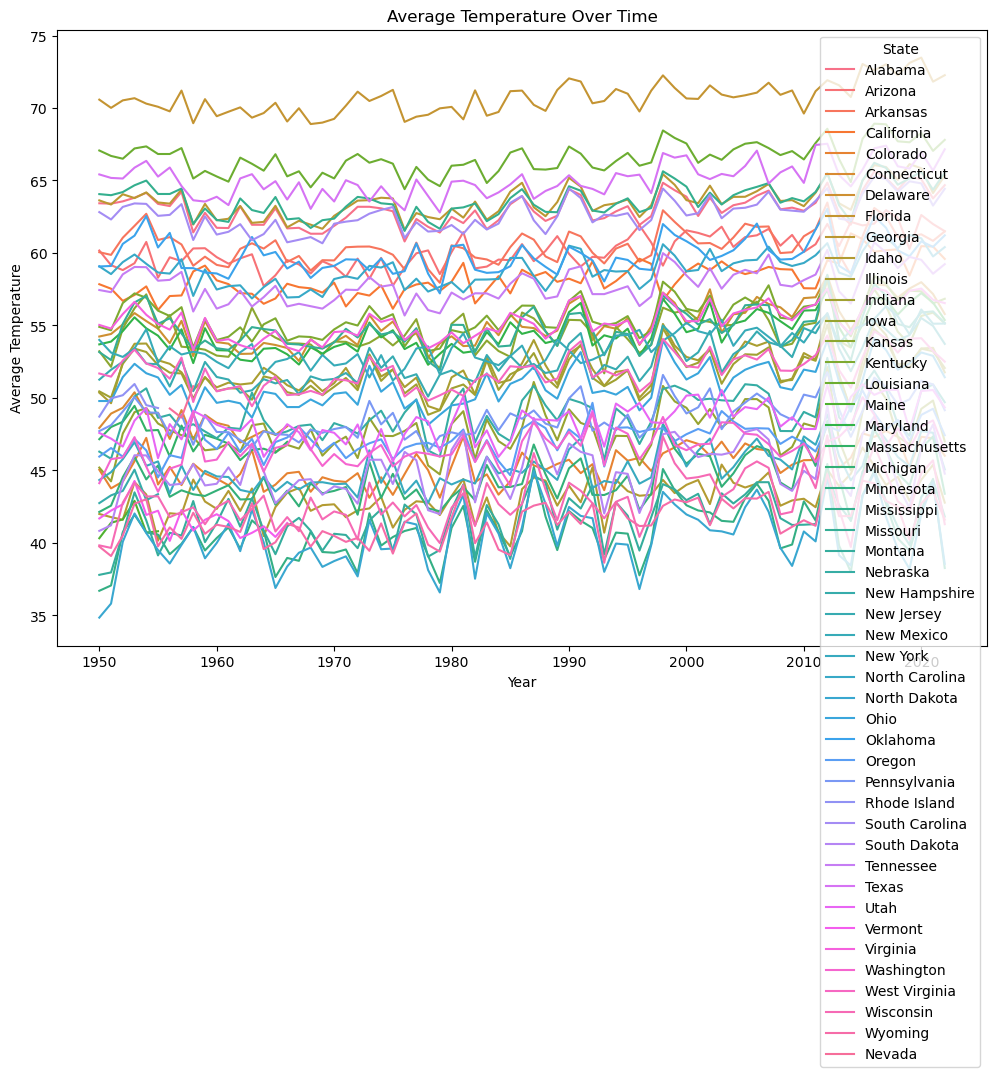

In [93]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_data, x='Year', y='average_temp', hue='state')
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend(title='State')
plt.show()

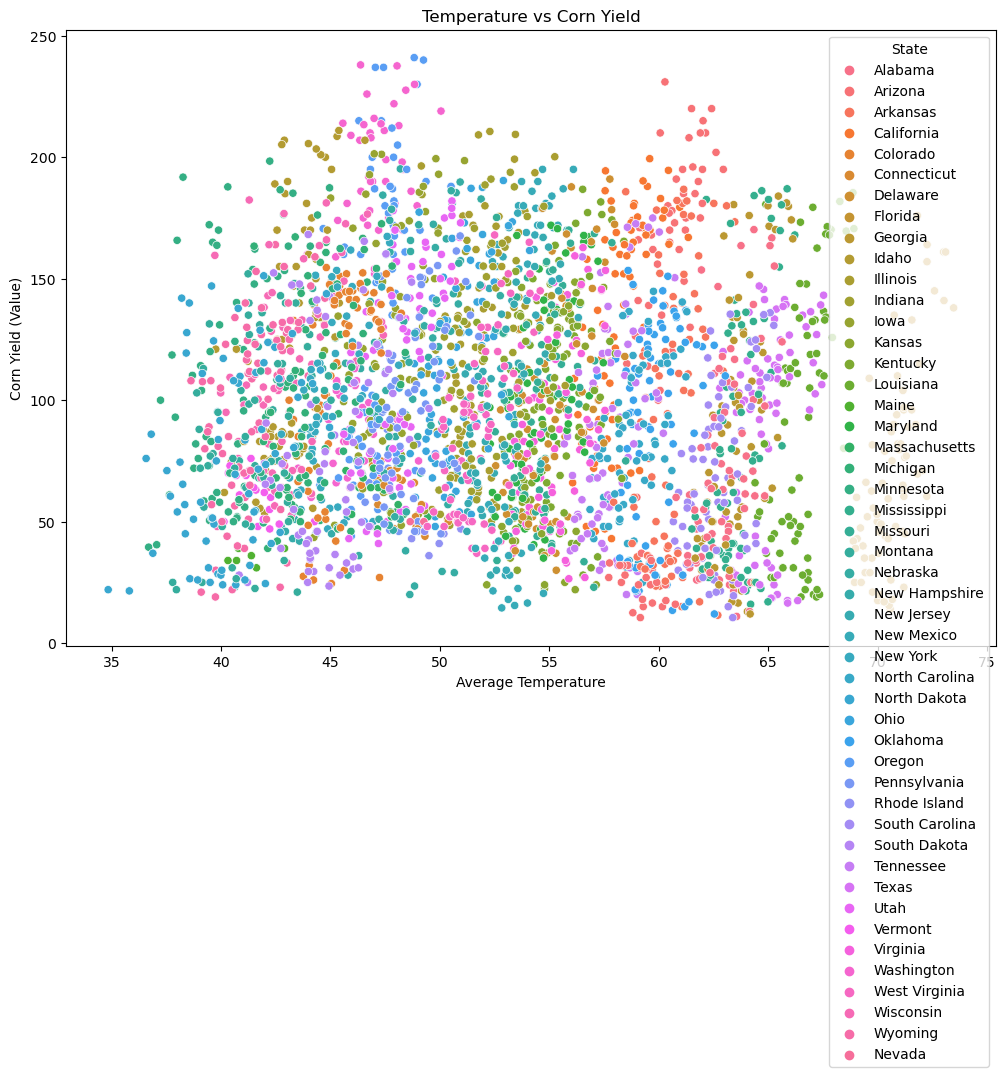

In [92]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='average_temp', y='Value', hue='state')
plt.title('Temperature vs Corn Yield')
plt.xlabel('Average Temperature')
plt.ylabel('Corn Yield (Value)')
plt.legend(title='State')
plt.show()

In [86]:
correlation_matrix = merged_data[['Value', 'average_temp']].corr()

In [87]:
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Value  average_temp
Value         1.000000     -0.072905
average_temp -0.072905      1.000000


In [88]:
summary_stats_by_state = merged_data.groupby('state')[['Value', 'average_temp']].describe()

In [89]:
print("\nSummary Statistics by State:")
print(summary_stats_by_state)


Summary Statistics by State:
               Value                                                           \
               count        mean        std   min   25%    50%     75%    max   
state                                                                           
Alabama         73.0   71.200685  42.625177  11.0  35.5   61.0   97.60  170.2   
Arizona         73.0  116.601370  74.842335  10.5  32.0  135.0  180.00  231.0   
Arkansas        73.0   92.440411  56.676993  11.5  36.0   94.4  139.00  186.8   
California      73.0  132.069178  45.477600  43.0  92.0  147.0  170.00  199.4   
Colorado        73.0  110.804795  40.015718  24.5  85.0  131.0  142.40  154.6   
Connecticut     17.0   60.352941  10.606255  44.0  50.0   65.0   68.00   75.0   
Delaware        73.0   97.980137  42.141325  30.0  66.0   88.0  126.40  191.0   
Florida         73.0   70.597260  41.321305  14.0  42.0   62.6   90.00  176.0   
Georgia         73.0   85.082192  52.466940  12.0  40.4   70.2  124.60  184.0  